In [18]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
  -y_train * torch.log(hypothesis)
  -(1 - y_train) * torch.log(1 - hypothesis)
  )

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze().item(), b.item()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406926
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773751
epoch: 300, cost: 0.390820, W: -2.174323, b: 6.609555
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191601
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587361
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971980, b: 9.004181
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381527, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [19]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [23]:
optimizer = torch.optim.SGD([W,b], lr=1.0)
optimizer1 = torch.optim.SGD([W,b], lr=1.0)
optimizer2 = torch.optim.Adam([W,b], lr=1.0)
optimizer3 = torch.optim.Adadelta([W,b])
optimizer4 = torch.optim.Adagrad([W,b])
optimizer5 = torch.optim.RMSprop([W,b])

print(optimizer)

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.01
    momentum: 0
    weight_decay: 0
)


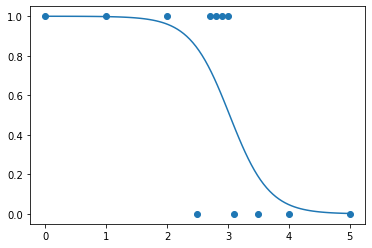

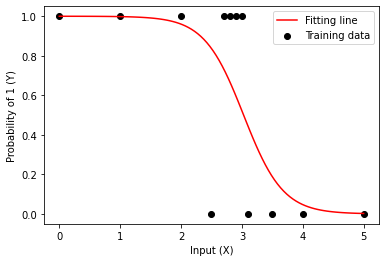

In [25]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y)
plt.show()
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()